## BA820 Project Proposal B1 Team 4 – Childcare Cost

This notebook conducts preliminary exploratory data analysis (EDA) on the National Database of Childcare Prices dataset at the county level. The goal is to uncover meaningful structural patterns related to childcare cost, affordability, family work structures, and labor market composition, and to develop insight-driven domain questions suitable for unsupervised analysis. The analysis emphasizes understanding variability, outliers, and hidden structure in the data rather than early model selection.

In [ ]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
file_id = "1b09CGXUgar75QTDnPObfits9ObA8rkTq"
url = f"https://drive.google.com/uc?id={file_id}"

output1 = "childcare_costs.csv"
gdown.download(url, output1, quiet=False)

childcare = pd.read_csv(output1)
childcare.head()

Downloading...
From: https://drive.google.com/uc?id=1b09CGXUgar75QTDnPObfits9ObA8rkTq
To: /content/childcare_costs.csv
100%|██████████| 10.7M/10.7M [00:00<00:00, 19.2MB/s]


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


In [ ]:
file_id = "1S_9tEJEzH6N9vWwbGCUSjg6A26C06WYc"
url = f"https://drive.google.com/uc?id={file_id}"

output2 = "counties.csv"
gdown.download(url, output2, quiet=False)

counties = pd.read_csv(output2)
counties.head()

Downloading...
From: https://drive.google.com/uc?id=1S_9tEJEzH6N9vWwbGCUSjg6A26C06WYc
To: /content/counties.csv
100%|██████████| 104k/104k [00:00<00:00, 8.63MB/s]


,county_fips_code,county_name,state_name,state_abbreviation
0,1001,Autauga County,Alabama,AL
1,1003,Baldwin County,Alabama,AL
2,1005,Barbour County,Alabama,AL
3,1007,Bibb County,Alabama,AL
4,1009,Blount County,Alabama,AL


In [ ]:
print(childcare.shape)
print(counties.shape)


(34567, 61)
(3144, 4)


## Dataset Overview

The Childcare Costs dataset contains county-level information from the National Database of Childcare Prices, including weekly childcare prices by provider type and child age group, along with socioeconomic indicators such as income, poverty, labor force participation, occupation mix, household work structures, and demographic composition from 2008 to 2018. This dataset is well suited for exploratory and unsupervised analysis because it captures multiple interacting dimensions of cost, affordability, family structure, and labor markets, enabling segmentation of counties into meaningful profiles and identification of outliers where childcare is particularly financially burdensome.

In [ ]:
#Joining County names
df = childcare.merge(counties, on="county_fips_code", how="left")

print(df.shape)
df[["county_fips_code", "county_name", "state_abbreviation", "study_year"]].head()

(34567, 64)


,county_fips_code,county_name,state_abbreviation,study_year
0,1001,Autauga County,AL,2008
1,1001,Autauga County,AL,2009
2,1001,Autauga County,AL,2010
3,1001,Autauga County,AL,2011
4,1001,Autauga County,AL,2012


## Minimal Data Preparation

Only minimal preparation is performed to preserve the dataset’s original structure for EDA. We verify missingness, confirm types, and create a small number of derived variables to support interpretation (without filtering or removing outliers).

In [ ]:
#checking missing values
missing_rate = df.isna().mean().sort_values(ascending=False)
missing_rate.head(20)


,0
mfccsa,0.323546
mfcc_preschool,0.323546
mfcc_infant,0.323546
mfcc_toddler,0.323546
mc_preschool,0.317470
mcsa,0.317470
mc_infant,0.317470
mc_toddler,0.317470
h_6to17_single_m,0.000058
h_under6_single_m,0.000058


In [ ]:
price_cols = ["mc_infant","mc_toddler","mc_preschool","mfcc_infant","mfcc_toddler","mfcc_preschool","mcsa","mfccsa"]
missing_rate[price_cols].sort_values(ascending=False)

,0
mfcc_infant,0.323546
mfccsa,0.323546
mfcc_preschool,0.323546
mfcc_toddler,0.323546
mc_preschool,0.317470
mc_toddler,0.317470
mc_infant,0.317470
mcsa,0.317470


# EDA Insight 1: Cost Measurement and Childcare Burden

In [ ]:
#defining filtered frames
#center based price price columns
core_price_cols = ["mc_infant", "mc_toddler", "mc_preschool"]

#All price columns
all_price_cols = ["mc_infant","mc_toddler","mc_preschool","mfcc_infant","mfcc_toddler","mfcc_preschool","mcsa","mfccsa"]
#keeping the columns where core childcare prices are present
df_prices = df.dropna(subset=core_price_cols).copy()

print("Original rows:", df.shape[0])
print("Rows with core center-based prices:", df_prices.shape[0])

Original rows: 34567
Rows with core center-based prices: 23593


In [ ]:
#burden calculation in terms of price relative to income
df_burden = df.dropna(subset=["mc_infant", "mhi_2018"]).copy()
print("Rows with mc_infant + mhi_2018:", df_burden.shape[0])

Rows with mc_infant + mhi_2018: 23593


**Interpretation**

We first evaluated the extent of missing data in the childcare price variables and discovered approximately 32% systematic missingness, especially concerning family childcare prices. Our focus is primarily on the center-based price columns, as they provide a more reliable foundation for cost analysis.

Additionally, we are developing a feature called "burden," which calculates the cost of childcare in relation to income.

# EDA Insight 2: Childcare Prices Alone Do Not Explain Mothers’ Workforce Participation


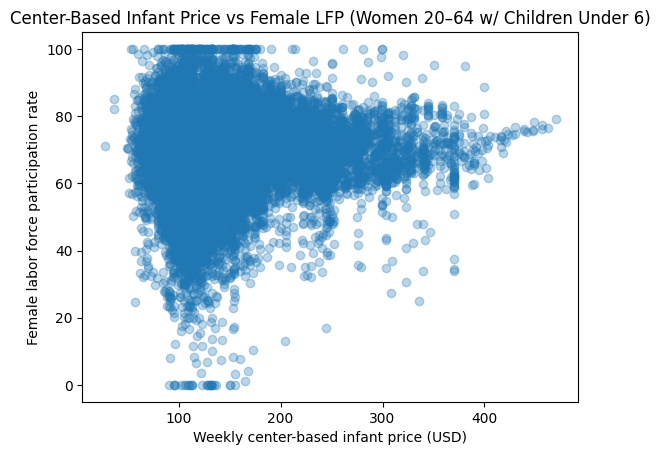

In [ ]:
x = df_prices["mc_infant"]
y = df_prices["flfpr_20to64_under6"]

mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Center-Based Infant Price vs Female LFP (Women 20–64 w/ Children Under 6)")
plt.xlabel("Weekly center-based infant price (USD)")
plt.ylabel("Female labor force participation rate")
plt.show()


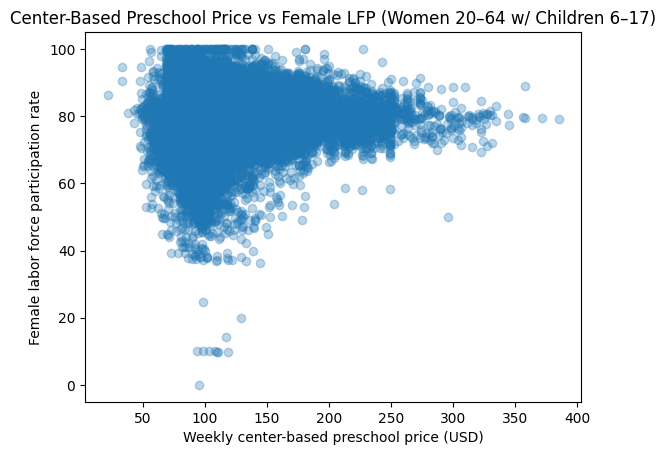

In [ ]:
# Same for women with children 6–17
x = df_prices["mc_preschool"]
y = df_prices["flfpr_20to64_6to17"]

mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Center-Based Preschool Price vs Female LFP (Women 20–64 w/ Children 6–17)")
plt.xlabel("Weekly center-based preschool price (USD)")
plt.ylabel("Female labor force participation rate")
plt.show()

In [ ]:
# Correlation on the rows where core prices exist
eda_cols = [
    "mc_infant", "mc_toddler", "mc_preschool",
    "mfcc_infant", "mfcc_toddler", "mfcc_preschool",
    "flfpr_20to64", "flfpr_20to64_under6", "flfpr_20to64_6to17",
    "mlfpr_20to64", "mhi_2018", "pr_f", "pr_p"
]

corr = df_prices[eda_cols].corr(numeric_only=True)
corr.round(2)


,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,mlfpr_20to64,mhi_2018,pr_f,pr_p
mc_infant,1.00,0.96,0.96,0.91,0.90,0.90,0.30,0.10,0.12,0.22,0.60,-0.37,-0.35
mc_toddler,0.96,1.00,0.98,0.89,0.91,0.89,0.34,0.13,0.15,0.24,0.60,-0.39,-0.37
mc_preschool,0.96,0.98,1.00,0.90,0.90,0.90,0.33,0.12,0.13,0.24,0.62,-0.39,-0.37
mfcc_infant,0.91,0.89,0.90,1.00,0.97,0.96,0.28,0.08,0.11,0.21,0.60,-0.37,-0.35
mfcc_toddler,0.90,0.91,0.90,0.97,1.00,0.99,0.29,0.09,0.12,0.21,0.59,-0.37,-0.36
mfcc_preschool,0.90,0.89,0.90,0.96,0.99,1.00,0.29,0.09,0.12,0.22,0.60,-0.37,-0.36
flfpr_20to64,0.30,0.34,0.33,0.28,0.29,0.29,1.00,0.56,0.66,0.56,0.53,-0.62,-0.61
flfpr_20to64_under6,0.10,0.13,0.12,0.08,0.09,0.09,0.56,1.00,0.38,0.18,0.15,-0.26,-0.24
flfpr_20to64_6to17,0.12,0.15,0.13,0.11,0.12,0.12,0.66,0.38,1.00,0.33,0.28,-0.42,-0.40
mlfpr_20to64,0.22,0.24,0.24,0.21,0.21,0.22,0.56,0.18,0.33,1.00,0.52,-0.54,-0.56


**Interpretation**

We examined scatter-plots for center-based infant prices and female labor force participation for mothers with children under 6 and for childeren between 6-17 and found out that for counties with low childcare prices, maternal workforce participation varies dramatically, while high-price counties tend to cluster around higher participation rates. This shows that in the counties where there is higher childcare costs, there is higher female labor participation.

We also found out that childcare price measures are strongly correlated with each other, meaning counties tend to be consistently high-cost or low-cost across ages. At the same time, childcare prices are strongly tied to county income and negatively related to poverty, which suggests that high prices often show up in higher-income counties

# EDA Insight 3: Household structure varies a lot across counties


In [ ]:
under6_cols = ["h_under6_both_work", "h_under6_f_work", "h_under6_m_work", "h_under6_single_m"]
six17_cols  = ["h_6to17_both_work", "h_6to17_fwork", "h_6to17_mwork", "h_6to17_single_m"]

df_hh = df[["county_fips_code","study_year","households"] + under6_cols + six17_cols].copy()
for c in under6_cols + six17_cols:
    df_hh[c + "_share"] = df_hh[c] / df_hh["households"]
df_hh[[c + "_share" for c in under6_cols]].describe().T

,count,mean,std,min,25%,50%,75%,max
h_under6_both_work_share,34567.0,0.069792,0.025683,0.0,0.053077,0.067550,0.084243,0.355140
h_under6_f_work_share,34567.0,0.043318,0.026289,0.0,0.027571,0.038251,0.052596,0.727273
h_under6_m_work_share,34567.0,0.003673,0.004296,0.0,0.000868,0.002845,0.004837,0.065274
h_under6_single_m_share,34565.0,0.050092,0.030036,0.0,0.031200,0.044061,0.062105,0.371231


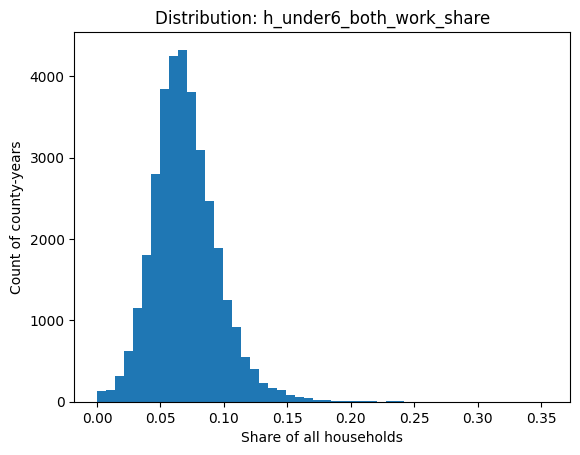

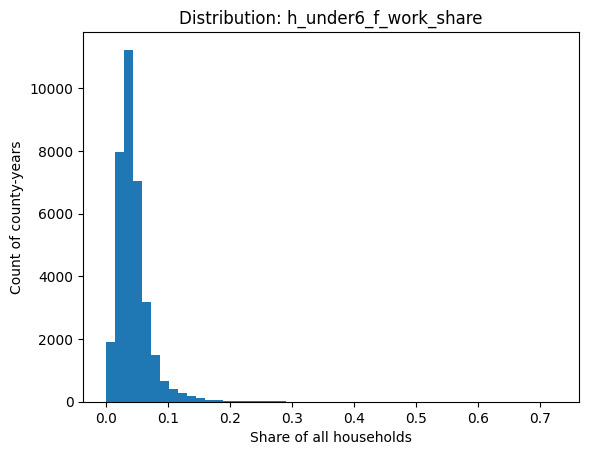

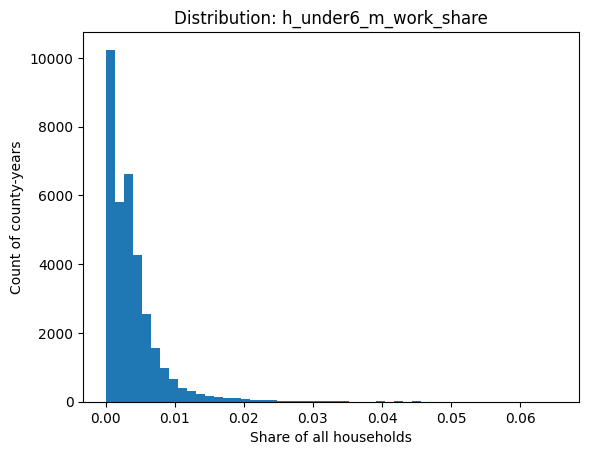

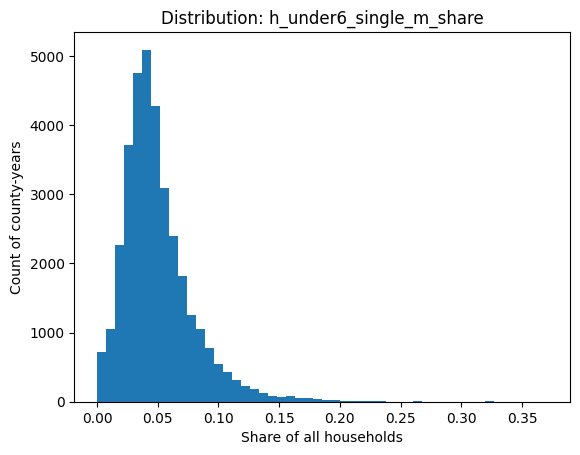

In [ ]:
# Distributions of shares (under 6)
for col in [c + "_share" for c in under6_cols]:
    s = df_hh[col].dropna()
    plt.figure()
    plt.hist(s, bins=50)
    plt.title(f"Distribution: {col}")
    plt.xlabel("Share of all households")
    plt.ylabel("Count of county-years")
    plt.show()

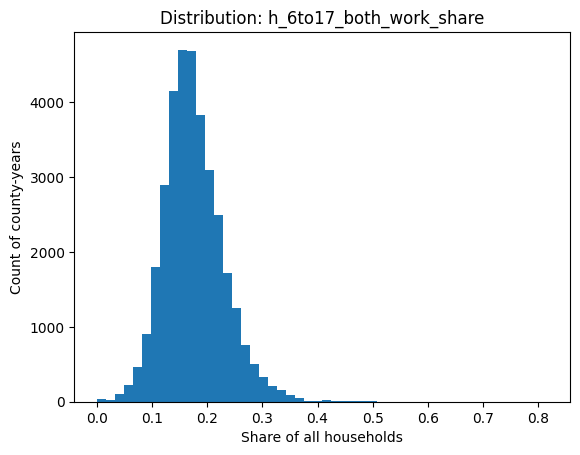

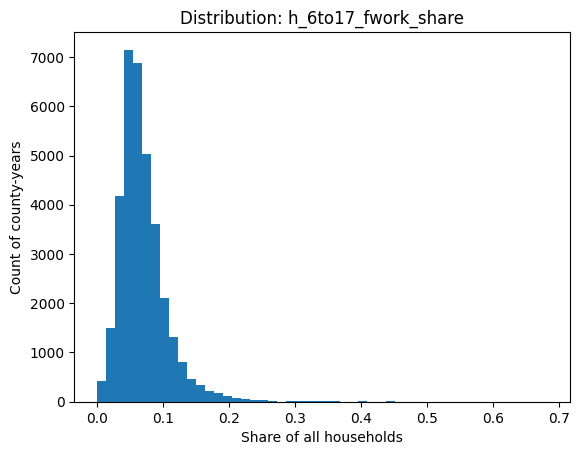

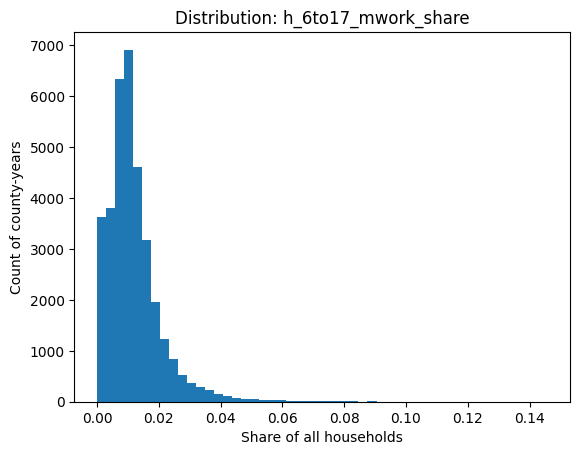

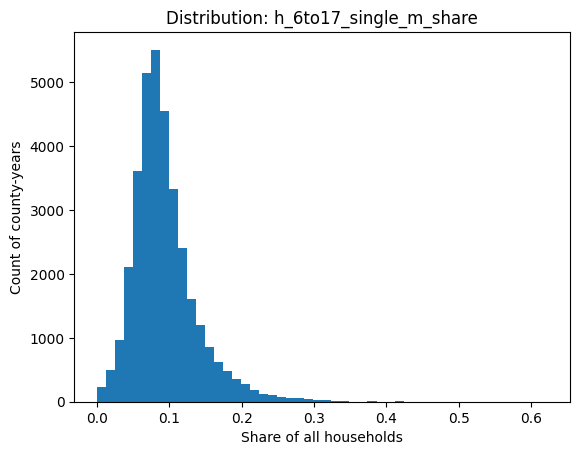

In [ ]:
# Distributions of shares (6–17)
for col in [c + "_share" for c in six17_cols]:
    s = df_hh[col].dropna()
    plt.figure()
    plt.hist(s, bins=50)
    plt.title(f"Distribution: {col}")
    plt.xlabel("Share of all households")
    plt.ylabel("Count of county-years")
    plt.show()

**Interpretation**

We translated household counts into shares of the total population and observed notable variations in family and work structures across counties. For households with children under six, the median share is 6.9% for those with "both parents working" and 4.3% for “single mother” households. "Father-only working" households have a median share of 3.8%, but they exhibit a very long right tail, with a maximum of 72.7%, highlighting extreme variations across county-years. Overall, these distributions and outliers indicate that family composition varies significantly across counties and should be considered a crucial factor when categorizing county types and assessing childcare pressure.

# EDA Insight 4: Burden shows affordability stress and extreme outliers

In [ ]:
df_burden["infant_center_burden"] = (df_burden["mc_infant"] * 52) / df_burden["mhi_2018"]
df_burden["preschool_center_burden"] = (df_burden["mc_preschool"] * 52) / df_burden["mhi_2018"]

df_burden[["infant_center_burden","preschool_center_burden"]].describe()

,infant_center_burden,preschool_center_burden
count,23593.000000,23593.000000
mean,0.151830,0.127876
std,0.043230,0.031951
min,0.032709,0.025407
25%,0.122511,0.105892
50%,0.146516,0.124491
75%,0.173247,0.145850
max,0.543006,0.386522


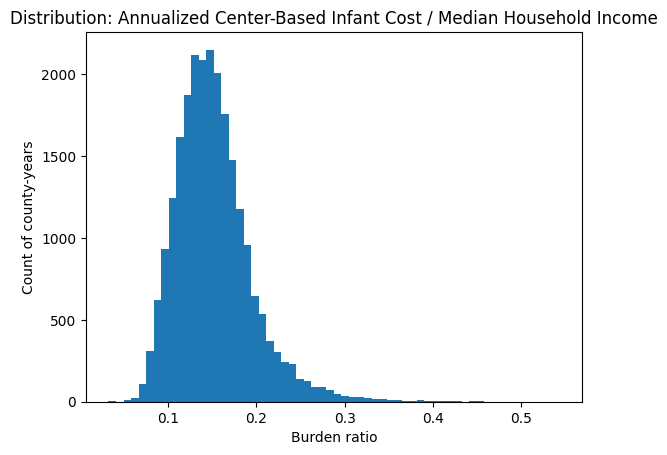

In [ ]:
# Histogram of burden
plt.figure()
plt.hist(df_burden["infant_center_burden"].dropna(), bins=60)
plt.title("Distribution: Annualized Center-Based Infant Cost / Median Household Income")
plt.xlabel("Burden ratio")
plt.ylabel("Count of county-years")
plt.show()

In [ ]:
# Top burden county-years (potential anomalies)
burden_view = df_burden[
    ["county_name","state_abbreviation","study_year","mc_infant","mhi_2018","infant_center_burden"]
].dropna().sort_values("infant_center_burden", ascending=False)

burden_view.head(20)

,county_name,state_abbreviation,study_year,mc_infant,mhi_2018,infant_center_burden
20139,Bronx County,NY,2018,397.70,38085.00,0.543006
32901,Whitman County,WA,2014,369.69,37712.68,0.509746
32593,Ferry County,WA,2014,369.69,39794.52,0.483079
32758,Pacific County,WA,2014,369.69,41783.08,0.460088
32747,Okanogan County,WA,2014,369.69,42044.90,0.457223
32769,Pend Oreille County,WA,2014,369.69,42474.20,0.452601
32759,Pacific County,WA,2015,339.29,39945.04,0.441684
32560,Columbia County,WA,2014,369.69,43535.26,0.441570
32902,Whitman County,WA,2015,322.96,38828.86,0.432511
32846,Stevens County,WA,2014,369.69,44637.66,0.430665


**Interpretation**

We developed a burden metric by annualizing weekly center-based infant childcare prices and dividing by median household income. On average, counties spend about 14.7% of their income on childcare, with an interquartile range of 12.3% to 17.3%. However, some counties report expenditures exceeding 40% to 50%, indicating extreme financial stress.

Notably, in 2018, Bronx County, NY, had a burden of 54.3%, and several Washington State counties (Whitman, Ferry, Pacific, Okanogan, and Pend Oreille) experienced burdens of 44% to 51% from 2014-2015. This suggests that high childcare prices and low incomes in certain areas lead to significant affordability issues.

Ultimately, our analysis shows that focusing only on childcare prices doesn't fully capture affordability. The burden metric helps identify "high-stress" counties where childcare costs are overwhelming for families.

# EDA Insight 5: Occupation mix helps explain where burden, not just price, is high


In [ ]:
occ_cols = ["emp_m", "emp_service", "emp_sales", "emp_n", "emp_p"]

# Quick correlation with burden
occ_corr_cols = occ_cols + ["infant_center_burden", "mc_infant", "mhi_2018", "pr_p"]
df_burden[occ_corr_cols].corr(numeric_only=True).round(2)

,emp_m,emp_service,emp_sales,emp_n,emp_p,infant_center_burden,mc_infant,mhi_2018,pr_p
emp_m,1.00,-0.28,-0.01,-0.42,-0.64,-0.01,0.45,0.62,-0.40
emp_service,-0.28,1.00,-0.05,-0.09,-0.22,0.33,0.00,-0.35,0.37
emp_sales,-0.01,-0.05,1.00,-0.41,-0.23,0.02,0.15,0.18,-0.10
emp_n,-0.42,-0.09,-0.41,1.00,0.02,-0.18,-0.35,-0.27,0.11
emp_p,-0.64,-0.22,-0.23,0.02,1.00,-0.07,-0.33,-0.38,0.19
infant_center_burden,-0.01,0.33,0.02,-0.18,-0.07,1.00,0.67,-0.16,0.27
mc_infant,0.45,0.00,0.15,-0.35,-0.33,0.67,1.00,0.60,-0.35
mhi_2018,0.62,-0.35,0.18,-0.27,-0.38,-0.16,0.60,1.00,-0.75
pr_p,-0.40,0.37,-0.10,0.11,0.19,0.27,-0.35,-0.75,1.00


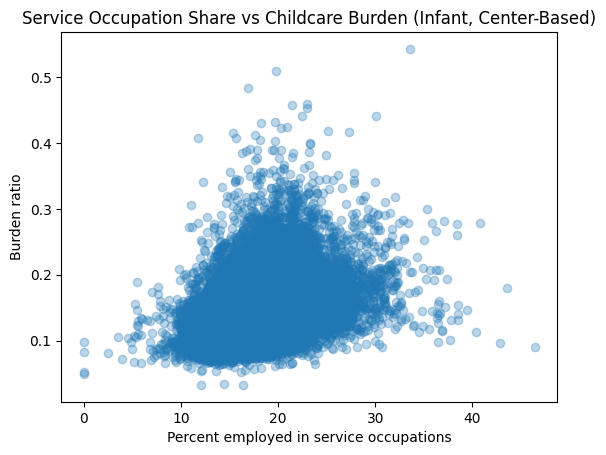

In [ ]:
# Simple scatter: service share vs burden (example)
x = df_burden["emp_service"]
y = df_burden["infant_center_burden"]
mask = x.notna() & y.notna()

plt.figure()
plt.scatter(x[mask], y[mask], alpha=0.3)
plt.title("Service Occupation Share vs Childcare Burden (Infant, Center-Based)")
plt.xlabel("Percent employed in service occupations")
plt.ylabel("Burden ratio")
plt.show()

**Interpretation**

We analyzed the relationship between occupation composition and both raw childcare prices and affordability burdens. Our findings show a positive correlation between center-based infant prices and the share of management/professional employment (emp_m ≈ 0.45) and income levels (mhi_2018 ≈ 0.60), indicating that higher prices are common in wealthier, professional-heavy counties.

In contrast, the burden measure is most strongly associated with the service employment share (emp_service ≈ 0.33) and poverty (pr_p ≈ 0.27), while showing a slight negative correlation with income (≈ -0.16).

This distinction emphasizes that some counties have high childcare costs due to wealth, while others experience affordability challenges due to their labor market structure. Analyzing occupation mix is thus effective for identifying counties where childcare is financially stressful, beyond just those with high costs.


# EDA Insight 6: Demographics relate more to income and price context than to burden

In [ ]:
demo_cols = ["one_race_w","one_race_b","one_race_a","one_race_i","one_race_h","one_race_other","two_races","hispanic"]

demo_corr_cols = demo_cols + ["infant_center_burden", "mc_infant", "mhi_2018", "pr_p"]
df_burden[demo_corr_cols].corr(numeric_only=True).round(2)

,one_race_w,one_race_b,one_race_a,one_race_i,one_race_h,one_race_other,two_races,hispanic,infant_center_burden,mc_infant,mhi_2018,pr_p
one_race_w,1.00,-0.82,-0.25,-0.35,-0.11,-0.23,-0.21,-0.10,-0.11,-0.01,0.12,-0.46
one_race_b,-0.82,1.00,0.02,-0.10,-0.05,-0.05,-0.11,-0.10,0.02,-0.15,-0.22,0.41
one_race_a,-0.25,0.02,1.00,-0.05,0.39,0.23,0.27,0.17,0.20,0.55,0.49,-0.17
one_race_i,-0.35,-0.10,-0.05,1.00,0.04,-0.03,0.26,-0.04,0.03,-0.05,-0.10,0.27
one_race_h,-0.11,-0.05,0.39,0.04,1.00,0.09,0.29,0.07,0.10,0.17,0.11,-0.04
one_race_other,-0.23,-0.05,0.23,-0.03,0.09,1.00,0.14,0.71,0.11,0.19,0.13,0.03
two_races,-0.21,-0.11,0.27,0.26,0.29,0.14,1.00,0.10,0.19,0.24,0.11,-0.00
hispanic,-0.10,-0.10,0.17,-0.04,0.07,0.71,0.10,1.00,0.07,0.10,0.07,0.10
infant_center_burden,-0.11,0.02,0.20,0.03,0.10,0.11,0.19,0.07,1.00,0.67,-0.16,0.27
mc_infant,-0.01,-0.15,0.55,-0.05,0.17,0.19,0.24,0.10,0.67,1.00,0.60,-0.35


**Interpretation**

We studied how the racial and ethnic makeup of a community relates to childcare prices, income, poverty, and affordability issues. Our findings show that certain demographic groups have stronger links to income and childcare prices than to affordability problems. For example, the percentage of Asian residents (one_race_a) is highly linked to both childcare prices (0.55) and income (0.49). Meanwhile, the percentage of Black residents (one_race_b) is more closely tied to poverty (0.41) and negatively related to income (-0.22).

In general, the links between demographic shares and affordability issues are small, mostly between 0.02 and 0.20.

This suggests that while demographic makeup can help explain the economic context of childcare prices, it does not directly show where childcare is most unaffordable. So, demographics are better for profiling and understanding different county types, rather than serving as key predictors of affordability stress.

# Project M3 - Problem Overview & Integrated Analytical Focus

Earlier individual and team work revealed that there was substantial variation in the childcare burden for counties even with similar income and childcare costs. However, we individually focused on either structural segmentation (via clustering) or anomaly detection separately.

In this Milestone, we will look to answer the following, refined question:

**How do structural county segments differ in childcare affordability, and within each segment, which counties stand out as anamolies relative to structurally similar peers?**

In order to do this, we will combine segmentation from Khoi Thai's M2 work with Hamza Tariq's anamoly detection work. The process begins by constructing a standardized county profile using key affordability, labor-market, and socioeconomic features. We will then apply k-means clustering to allot each county to a cluster according to its structural dinmensions.

Once these clusters are finalized, we will use a distance-based anomaly detection layer. Within each cluster, we compute each county’s distance from its cluster centroid and flag counties that lie unusually far from their peers. This will allow us to detect anamolies within the structural groups of counties. This provides a more nuanced understanding of where childcare burden is unusually high or low relative to local structural context, offering clearer implications for targeted policy or regional intervention strategies.

### 1. Constructing a County-Level Childcare Burden Measure

Before applying segmentation and anomaly detection, we first construct a consistent county-level affordability profile. We will transform the raw childcare prices into a meaningful burden measure.

We will start by removing the counties with missing childcare cost or income values. Then we will make the burden measure by converting the weekly childcare costs into annual costs and then we divide it by the median household income. This gives us a clearer picture of how expensive childcare is relative to what families earn. Lastly we will select a small set of features like childcare cost, income, burden and professional employment shares.

 This will ensure that all later analyses are based on a clean and interpretable profile.

In [ ]:
df = df.dropna(subset=["mc_infant", "mhi_2018"])
df["infant_center_burden"] = (df["mc_infant"] * 52) / df["mhi_2018"]
#occupation columns
occ_cols = ["memp_p", "femp_p"]

keep_cols = occ_cols + ["infant_center_burden", "mc_infant", "mhi_2018"]
df_u = df.dropna(subset=keep_cols).copy()
df_u.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool,county_name,state_name,state_abbreviation,infant_center_burden
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,104.95,104.95,85.92,83.45,83.45,81.40,Autauga County,Alabama,AL,0.093349
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,105.11,105.11,87.59,87.39,87.39,85.68,Autauga County,Alabama,AL,0.090775
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,105.28,105.28,89.26,91.33,91.33,89.96,Autauga County,Alabama,AL,0.088620
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,105.45,105.45,90.93,95.28,95.28,94.25,Autauga County,Alabama,AL,0.090835
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,105.61,105.61,92.60,99.22,99.22,98.53,Autauga County,Alabama,AL,0.092843


df_year["infant_center_burden"] = (df_year["mc_infant"] * 52) / df_year["mhi_2018"]
df_year[["mc_infant","mhi_2018","infant_center_burden"]].describe()

In [ ]:
df_u["infant_center_burden"] = (df_u["mc_infant"] * 52) / df_u["mhi_2018"]
df_u[["mc_infant","mhi_2018","infant_center_burden"]].describe()

,mc_infant,mhi_2018,infant_center_burden
count,23593.000000,23593.000000,23593.000000
mean,146.051770,50631.312692,0.151830
std,53.698566,13407.444469,0.043230
min,27.730000,19841.920000,0.032709
25%,108.750000,41998.000000,0.122511
50%,134.500000,48634.920000,0.146516
75%,166.330000,56421.300000,0.173247
max,470.000000,136268.000000,0.543006


**Insight:** The statistics show that there is a big variation in the childcare costs and affordability burden accross counties. The average childcare burden is 15.1%, however, the distribution in the dataset ranges from 3.2% to a concerning 54.3%. This is an indication of uneven distribution.
These findings are in line with the insights from the previous milestones where we found out that income and price alone cannot explain childcare burden. These findings justify us moving ahead with our question of finding the anamolies within different county clusters.

### 2. Exploring Structural Patterns Using Principal Component Analysis (PCA)

Before conducting clustering, we use Principal Component Analysis(PCA) to examine the structural relationships between occupations and childcare burden accross counties.
PCA was selected for reducing these correlated variables into a lower-dimensional space with components that retain most of the variation in the data. This will enable us to identify the hidden structural dimensions that define the counties.

All variables were standardized to give equal weight before applying PCA. Then, the scree plot was analyzed to determine the number of components that are useful in describing the variation in the data, and the component values were analyzed to identify the primary structural axes.

The representation of the counties in the PCA space allows us to explore the alignment of childcare burden with the hidden labor market structures and justifies the segmentation method employed in the next step.

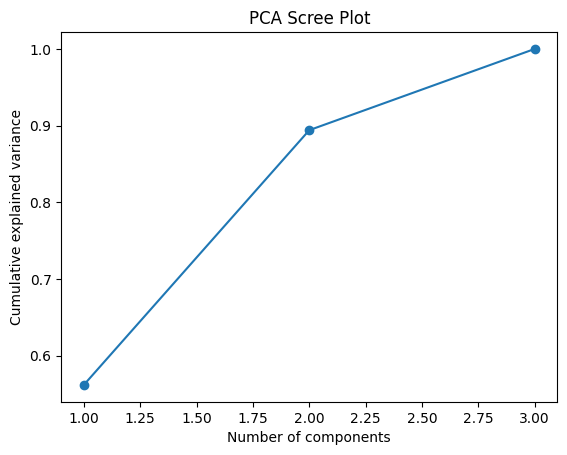

,PC1,PC2,PC3
memp_p,0.706,0.029,0.708
femp_p,0.703,0.089,-0.705
infant_center_burden,-0.084,0.996,0.042


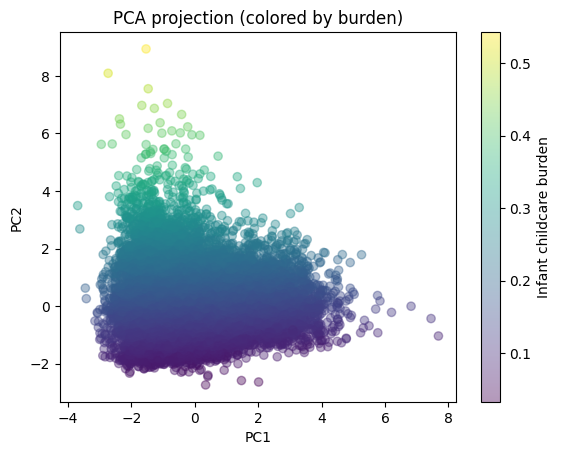

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

features = occ_cols + ["infant_center_burden"]
X = df_u[features]
#standardizing features
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA()
Xp = pca.fit_transform(Xz)

#ploting the scree plot
plt.figure()
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker="o"
)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Scree Plot")
plt.show()

#PC interpretation table
loadings = pd.DataFrame(
    pca.components_.T,
    index=features,
    columns=[f"PC{i+1}" for i in range(len(features))]
)
display(loadings.round(3))

#plotting pca scatterplot
plt.figure()
plt.scatter(Xp[:, 0], Xp[:, 1],
            c=df_u["infant_center_burden"], alpha=0.4)
plt.colorbar(label="Infant childcare burden")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection (colored by burden)")
plt.show()


**Insight & Interpretation:**

The scree plot shows that the first two PCA components can explain 90% of the variance in the dataset. This shows that the differences accross counties in occupations and the childcare burden can be effectively summarized accross 2 dimensions.

If we look at the loading matrix, we can see that the first component is all about professional and managerial employment shares, which means that it represents a structural labor-market axis. On the other hand, PC2 is driven by infant childcare burden which means that it represents a affordability pressure axis. We can see that these components are very independent to each other which suggests that labor-market structure and childcare burden vary somewhat independently across counties.

The PCA scatter plot shows that the burden of childcare rises strongly along PC2, which shows that that PC2 captures a strong affordability pressure axis. The tight grouping of counties in the lower PC2 area indicates that most counties face low to medium levels of burden, and the thin upper tail indicates structurally high levels of burden. Moreover, as you increase along the PC1 axis, which captures strong professional labor market composition, you are commonly linked to a lower PC2 value, which indicates that counties with more professional labor market composition face lower levels of childcare burden. This observation again supports that affordability pressure is structurally related to labor market composition rather than childcare prices

### 3. Structural Segmentation and Within-Cluster Anomaly Detection

In this step, we will integrate our segmentation and anomaly detection to answer our refined question of how do structural county segments differ in childcare affordability, and within each segment, which counties stand out relative to similar peers?

First we restrict our dataset to one year(2018) so that each county only appears once and we ensure we are comparing counties structurally rather than over time. Next, we build a combined feature set containing childcare burden, income, childcare cost, labor force participation, unemployment, and occupational structure. All variables are standardized so that clustering is independent of differences in scale. We then perform K-means clustering to segment counties into structurally similar groups. The optimal number of clusters (K) is determined using silhouette analysis to ensure that the clusters are well-separated.

Finally, within each cluster, we compute the distance of each county to its cluster centroid. The top 1% of counties that are furthest away from their  cluster center are flagged as anomalies.


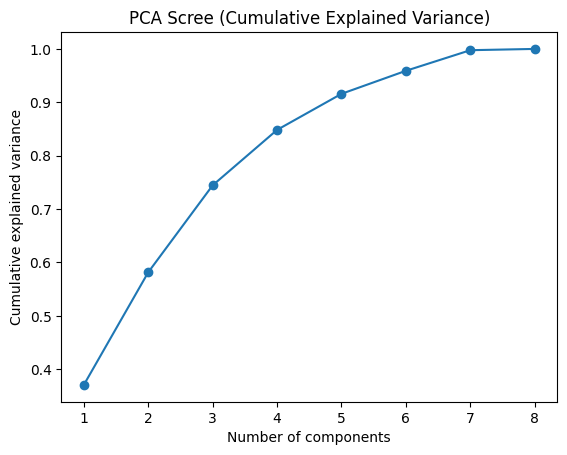

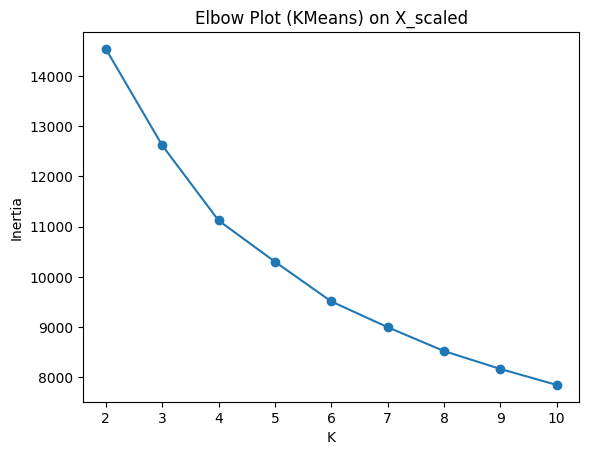

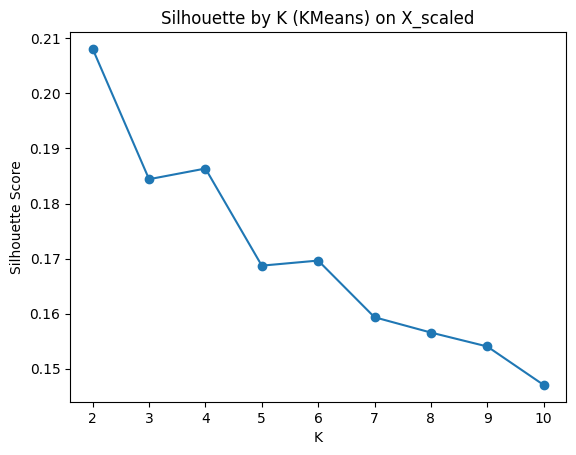

Chosen K (by silhouette): 2


,infant_center_burden,mc_infant,mhi_2018,unr_20to64,flfpr_20to64,flfpr_20to64_under6,memp_p,femp_p
cluster,,,,,,,,
1,0.166,192.187,60821.291,4.037,74.810,74.888,20.329,6.337
0,0.161,133.688,43864.647,6.620,64.573,66.170,29.180,9.781


,n,anomaly_rate,mean_burden,mean_dist
cluster,,,,
0,1202,0.011,0.161,2.308
1,1158,0.010,0.166,2.228


,infant_center_burden,mc_infant,mhi_2018,unr_20to64,flfpr_20to64,flfpr_20to64_under6,memp_p,femp_p
cluster,,,,,,,,
0,0.011,1.985,27.496,11.497,-0.618,-12.475,-3.816,0.310
1,0.066,205.262,39588.031,0.249,2.945,1.141,-10.399,-1.235


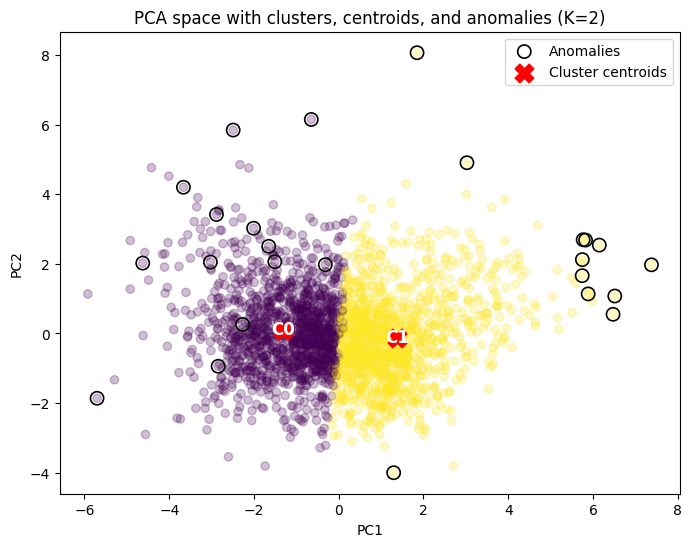

,county_fips_code,county_name,state_abbreviation,cluster,dist_to_centroid,anomaly_rank_in_cluster,infant_center_burden,mc_infant,mhi_2018
2673,48301,Loving County,TX,0,10.065715,1,0.098602,155.25,81875.0
2376,46031,Corson County,SD,0,7.854827,2,0.151711,103.40,35441.0
1460,28119,Quitman County,MS,0,7.574135,3,0.133822,65.65,25510.0
187,6003,Alpine County,CA,0,7.504026,4,0.247749,308.20,64688.0
2923,51595,Emporia city,VA,0,7.200725,5,0.286483,170.00,30857.0
1428,28055,Issaquena County,MS,0,7.027514,6,0.114809,56.91,25776.0
2427,46137,Ziebach County,SD,0,6.884124,7,0.144759,103.40,37143.0
2546,48047,Brooks County,TX,0,6.446951,8,0.293542,154.55,27378.0
2381,46041,Dewey County,SD,0,6.332733,9,0.118436,100.11,43954.0
2412,46102,Oglala Lakota County,SD,0,6.181478,10,0.177177,103.40,30347.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#building 2018 profile table
YEAR = 2018
df = childcare.merge(counties, on="county_fips_code", how="left").copy()

#burden metric
df["infant_center_burden"] = (df["mc_infant"] * 52) / df["mhi_2018"]
df_yr = df[df["study_year"] == YEAR].copy()
#keeping one row per county in 2018
df_profile = (
    df_yr.groupby(["county_fips_code", "county_name", "state_abbreviation"], as_index=False)
         .mean(numeric_only=True)
)

#defining feature set
candidate_features = ["infant_center_burden", "mc_infant", "mhi_2018","unr_20to64", "flfpr_20to64", "flfpr_20to64_under6","memp_p", "femp_p",]
#keeping only exoisting colimns and dropping rows with nonexisting cols
feature_cols = [c for c in candidate_features if c in df_profile.columns]
model_df = df_profile.dropna(subset=feature_cols).copy()

#standardzing features
X = model_df[feature_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Pca
pca_full = PCA(random_state=42).fit(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cum_var) + 1), cum_var, marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Scree (Cumulative Explained Variance)")
plt.show()

pca_2 = PCA(n_components=2, random_state=42)
PC = pca_2.fit_transform(X_scaled)
model_df["PC1"] = PC[:, 0]
model_df["PC2"] = PC[:, 1]

#tuning kmeans
ks = range(2, 11)
inertia, sil = [], []

for k in ks:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(list(ks), inertia, marker="o")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.title("Elbow Plot (KMeans) on X_scaled")
plt.show()

plt.figure()
plt.plot(list(ks), sil, marker="o")
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette by K (KMeans) on X_scaled")
plt.show()

k_final = list(ks)[int(np.argmax(sil))]
print("Chosen K (by silhouette):", k_final)

km_final = KMeans(n_clusters=k_final, n_init=50, random_state=42)
model_df["cluster"] = km_final.fit_predict(X_scaled)

#adding the anomoly layer
centroids = km_final.cluster_centers_

dist_to_centroid = np.linalg.norm(
    X_scaled - centroids[model_df["cluster"].values],
    axis=1
)
model_df["dist_to_centroid"] = dist_to_centroid

#flagging top 1% furtheset counties
model_df["is_anomaly"] = False
for c in sorted(model_df["cluster"].unique()):
    mask = model_df["cluster"] == c
    cutoff = model_df.loc[mask, "dist_to_centroid"].quantile(0.99)
    model_df.loc[mask, "is_anomaly"] = model_df.loc[mask, "dist_to_centroid"] >= cutoff

#ranking animalies within clusters
model_df["anomaly_rank_in_cluster"] = (
    model_df.groupby("cluster")["dist_to_centroid"]
            .rank(ascending=False, method="dense")
            .astype(int)
)

#interpretation tables
cluster_profile = (
    model_df.groupby("cluster")[feature_cols]
            .mean()
            .round(3)
            .sort_values("infant_center_burden", ascending=False)
)
display(cluster_profile)

anomaly_by_cluster = (
    model_df.groupby("cluster")
            .agg(
                n=("cluster", "size"),
                anomaly_rate=("is_anomaly", "mean"),
                mean_burden=("infant_center_burden", "mean"),
                mean_dist=("dist_to_centroid", "mean")
            )
            .round(3)
)
display(anomaly_by_cluster)
#comparing anomalies vs non-anomalies within each cluster
comp_frames = []
for c in sorted(model_df["cluster"].unique()):
    sub = model_df[model_df["cluster"] == c]
    anom_mean = sub[sub["is_anomaly"]][feature_cols].mean()
    norm_mean = sub[~sub["is_anomaly"]][feature_cols].mean()
    diff = (anom_mean - norm_mean).to_frame(name="anom_minus_non").T
    diff["cluster"] = c
    comp_frames.append(diff)

anom_vs_non = pd.concat(comp_frames, ignore_index=True).set_index("cluster").round(3)
display(anom_vs_non)

#pca plot
plt.figure(figsize=(8, 6))

plt.scatter(
    model_df["PC1"],
    model_df["PC2"],
    c=model_df["cluster"],
    alpha=0.25
)

#highlighting the anomaly
anom = model_df[model_df["is_anomaly"]]
plt.scatter(
    anom["PC1"],
    anom["PC2"],
    s=90,
    facecolors="none",
    edgecolors="black",
    linewidths=1.2,
    label="Anomalies"
)

#projecting the centrouds and labeling them
centroids_scaled = km_final.cluster_centers_
centroids_pca = pca_2.transform(centroids_scaled)

plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c="red",
    s=180,
    marker="X",
    label="Cluster centroids"
)
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x, y, f"C{i}", fontsize=12, fontweight="bold",
             ha="center", va="center", color="white")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA space with clusters, centroids, and anomalies (K=2)")
plt.legend()
plt.show()

#top anomalies
top_anoms = (
    model_df[model_df["is_anomaly"]]
    .sort_values(["cluster", "dist_to_centroid"], ascending=[True, False])
    [["county_fips_code", "county_name", "state_abbreviation",
      "cluster", "dist_to_centroid", "anomaly_rank_in_cluster",
      "infant_center_burden", "mc_infant", "mhi_2018"]]
    .head(20)
)
display(top_anoms)


**Insight & Interpretation**
The silhouette score was highest for k=2, indicating that two clusters provided the clearest separation between counties. Although the elbow plot showed gradual reductions in inertia as k increased, it had the highest break between k=2 hence we selected k=2 as our final k.

The 2 clusters represent a clear divide. Cluster 0 represents the counties that have a lower income, lower-cost with higher unemployment and lower labor-force participation. Their lower childcare costs ($134) combined with their low incomes (43865) result in a moderate childcare burden. On the other hand, cluster 1 represents counties that have higher inome and higher costs. Despite higher incomes, average burden is slightly higher (0.166), indicating that high childcare prices offset income advantages.

The anomalies were identified as the top 1% furthest away counties from their centroids. The anomaly rates were nearly identical for both the clusters (1.1% for cluster 0 and 1% for cluster 1). The anomalies follow a consistent and interpretable pattern. They are not simply noise but rather represent the counties that lie outside the regular relationship between income, cost, and burden in their structural group.

In Cluster 0, the anomalies are primarily small or rural counties that have abnormal combinations of income and childcare price. These include Loving County, TX; Corson County, SD; Issaquena County, MS; and Alpine County, CA. These counties tend to have very low income and unexpectedly low childcare prices, or moderate income and abnormally high childcare costs. In many instances, these represent sparse rural childcare markets where prices do not smoothly scale with income. Consequently, these counties appear as structural outliers in the rural region.

In Cluster 1, the anomalies are primarily large urban counties such as Bronx County, NY; San Francisco County, CA; Arlington County, VA; Loudoun County, VA; and Kings County, NY. These counties tend to have extremely high childcare costs, and their income levels either do not keep pace with the costs or are very high but still high in burden. These instances represent urban cost pressures, where the high labor density of urban areas causes childcare prices to rise, often outpacing income increases.

Overall, PCA, clustering and anomaly framework reveals a two-tier structure.  Counties first divide into two broad economic segments differentiated by income levels, childcare costs, and labor-market strength. Then, anomalies emerge when a county deviates from the average relationship between income and childcare costs. We should note that the average childcare burden is not significantly different between the two clusters (0.161 vs. 0.166), this means that it is the economic structure that generates that burden. This suggests that childcare affordability cannot be understood alone, and needs structural segmentation to understand where the affordability pressures originate.